In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/titanic_toy.csv")

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

# Mean/ Median Imputation

In [6]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [8]:
x_train.shape,x_test.shape

((623, 3), (268, 3))

## 1) Using pandas fillna()

In [15]:
x_train['Mean_age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_train['Mean_fare'] = x_train['Fare'].fillna(x_train['Fare'].mean())

x_train['Median_age'] = x_train['Age'].fillna(x_train['Age'].median())
x_train['Median_fare'] = x_train['Fare'].fillna(x_train['Fare'].median())

In [17]:
x_train.sample(5)

,Age,Fare,Family,Mean_age,Mean_fare,Median_age,Median_fare
541,9.0,31.2750,6,9.000000,31.2750,9.0,31.2750
404,20.0,8.6625,0,20.000000,8.6625,20.0,8.6625
42,NaN,7.8958,0,29.915339,7.8958,29.0,7.8958
67,19.0,8.1583,0,19.000000,8.1583,19.0,8.1583
136,19.0,26.2833,2,19.000000,26.2833,19.0,26.2833


In [19]:
print("Original Age Variance:",x_train["Age"].var())
print("Mean Age Variance:",x_train["Mean_age"].var())
print("Median Age Variance:",x_train["Median_age"].var())
print()
print("Original Fare Variance:",x_train["Fare"].var())
print("Mean Fare Variance:",x_train["Mean_fare"].var())
print("Median Fare Variance:",x_train["Median_fare"].var())

Original Age Variance: 210.4528692463678
Mean Age Variance: 169.51268085599725
Median Age Variance: 169.64401397346103

Original Fare Variance: 2378.850836641955
Mean Fare Variance: 2252.6417086529127
Median Fare Variance: 2268.7904337281766


### Let's see the distribution of Age column after applying mean and median 

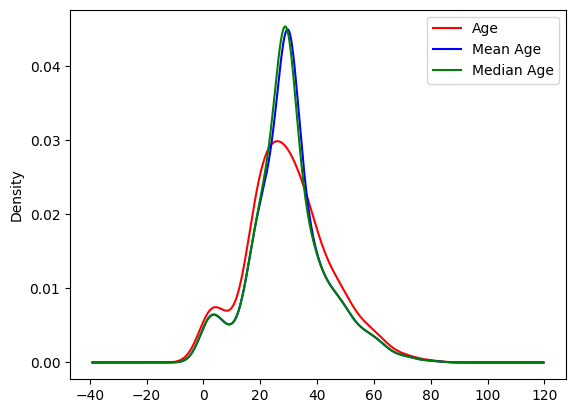

In [23]:
fig,ax = plt.subplots()
x_train["Age"].plot(kind = 'kde',color = 'red',label='Age')
x_train["Mean_age"].plot(kind = 'kde',color = "blue",label="Mean Age")
x_train["Median_age"].plot(kind = 'kde',color = "green",label = "Median Age")
plt.legend()
plt.show()

#### Insight: If the distribution changes too much after applying mean or median imputation, it indicates that this method is not suitable for the Age column, especially since it has more than 5% missing values.

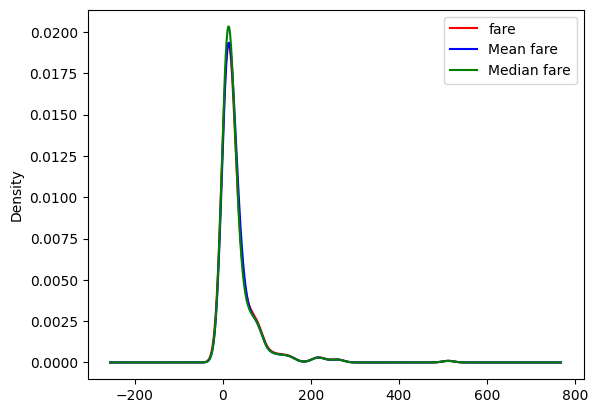

In [24]:
fig,ax = plt.subplots()
x_train["Fare"].plot(kind = 'kde',color = 'red',label='fare')
x_train["Mean_fare"].plot(kind = 'kde',color = "blue",label="Mean fare")
x_train["Median_fare"].plot(kind = 'kde',color = "green",label = "Median fare")
plt.legend()
plt.show()

#### Insight: There are no too much distribution changes in Fare column That's why we can apply meadn/median imputation on Fare column

In [25]:
x_train.cov()

,Age,Fare,Family,Mean_age,Mean_fare,Median_age,Median_fare
Age,210.452869,88.495367,-6.086107,210.452869,83.523671,210.452869,83.277817
Fare,88.495367,2378.850837,17.556587,71.044753,2378.850837,72.433134,2378.850837
Family,-6.086107,17.556587,2.844782,-4.902154,16.625128,-4.912644,16.726309
Mean_age,210.452869,71.044753,-4.902154,169.512681,67.275497,169.512681,67.077470
Mean_fare,83.523671,2378.850837,16.625128,67.275497,2252.641709,68.590218,2252.641709
Median_age,210.452869,72.433134,-4.912644,169.512681,68.590218,169.644014,68.355010
Median_fare,83.277817,2378.850837,16.726309,67.077470,2252.641709,68.355010,2268.790434


#### From the covariance table, we can clearly see that the original relationship between the Age column and the Fare column is 88.49. However, after applying mean or median imputation, it reduces to 71.04 and 72.43 respectively, which shows a significant loss of information and is therefore inappropriate.

In [26]:
x_train.corr()

,Age,Fare,Family,Mean_age,Mean_fare,Median_age,Median_fare
Age,1.000000,0.118049,-0.287479,1.000000,0.115280,1.000000,0.114471
Fare,0.118049,1.000000,0.210147,0.111447,1.000000,0.113582,1.000000
Family,-0.287479,0.210147,1.000000,-0.223235,0.207680,-0.223626,0.208199
Mean_age,1.000000,0.111447,-0.223235,1.000000,0.108870,0.999613,0.108163
Mean_fare,0.115280,1.000000,0.207680,0.108870,1.000000,0.110955,0.996435
Median_age,1.000000,0.113582,-0.223626,0.999613,0.110955,1.000000,0.110180
Median_fare,0.114471,1.000000,0.208199,0.108163,0.996435,0.110180,1.000000


<Axes: >

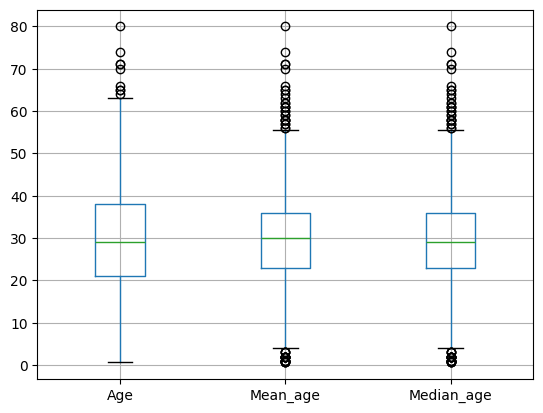

In [29]:
x_train[["Age","Mean_age","Median_age"]].boxplot()

#### After applying mean or median imputation, too many outliers are detected, which indicates that this method is not sufficient.

<Axes: >

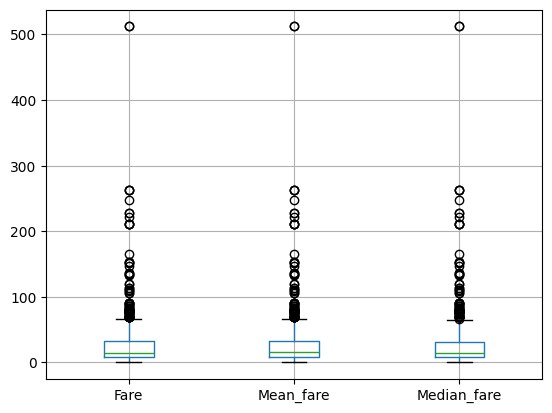

In [30]:
x_train[["Fare","Mean_fare","Median_fare"]].boxplot()

## 2) Using SKlearn

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [36]:
x_train.shape

(623, 3)

In [37]:
imputer1 = SimpleImputer(strategy = "median")
imputer2 = SimpleImputer(strategy = "mean")

In [38]:
trf = ColumnTransformer([
    ("Imputer1",imputer1,["Age"]),
    ("Imputer2",imputer2,["Fare"])    
])

In [39]:
trf.fit(x_train)

ColumnTransformer(transformers=[('Imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('Imputer2', SimpleImputer(), ['Fare'])])

In [43]:
trf.named_transformers_['Imputer1'].statistics_

array([29.])

In [44]:
trf.named_transformers_['Imputer2'].statistics_

array([32.42773237])

In [45]:
x_train_trans = trf.transform(x_train)
x_test_trans = trf.transform(x_test)

In [51]:
new_x_train = pd.DataFrame(x_train_trans,columns = ["Age","Fare"])
new_x_train.head()

,Age,Fare
0,51.0,26.5500
1,49.0,76.7292
2,1.0,46.9000
3,54.0,77.2875
4,29.0,14.4583


In [52]:
x_train.head()

,Age,Fare,Family
857,51.0,26.5500,0
52,49.0,76.7292,1
386,1.0,46.9000,7
124,54.0,77.2875,1
578,NaN,14.4583,1
